## Visualizing intermediate activations

* Intermediate activations are the output feature map of each layer
* Because each channel in an output is a feature learned
    * Plot each channel as a 2D image, this way is possible to:
        * Visualize how convnets transforms their inputs
        * Get a better understanding of how the convolutional kernel works as a filter

In [2]:
from keras.models import load_model

In [3]:
model = load_model('cats_and_dogs_small_2.h5')

In [4]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 15, 15, 128)       147584    
__________

In [5]:
img_path = '../../../newvolume/cat-dog-data/cats_and_dogs_small/test/cats/cat.1700.jpg'

from keras.preprocessing import image
import numpy as np

img = image.load_img(img_path, target_size=(150, 150))
img_tensor = image.img_to_array(img)
img_tensor = np.expand_dims(img_tensor, axis=0)
img_tensor /= 255.

print(img_tensor.shape)

(1, 150, 150, 3)


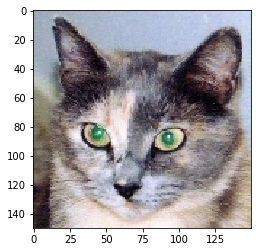

In [7]:
import matplotlib.pyplot as plt

plt.imshow(img_tensor[0])
plt.show()

In order to visualize the intermediate activations is necessary to create a model that takes an image as input and outputs the output feature map of each layer. Enter class Model, which unlike Sequential, allows multiple outputs.

In this case the input is the same as the loaded model, an image, and the outputs are each layer learned feature maps. 

In [8]:
from keras import models

layer_outputs = [layer.output for layer in model.layers[:8]]
activation_model = models.Model(inputs=model.input, outputs=layer_outputs)  # Model allows multiple outputs

In [9]:
activations = activation_model.predict(img_tensor)

In [10]:
first_layer_activation = activations[0]
print(first_layer_activation.shape)

(1, 148, 148, 32)


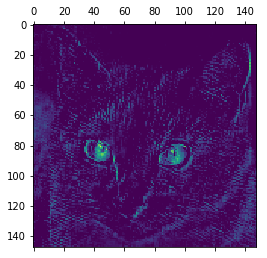

In [11]:
import matplotlib.pyplot as plt

plt.matshow(first_layer_activation[0, :, :, 4], cmap='viridis')

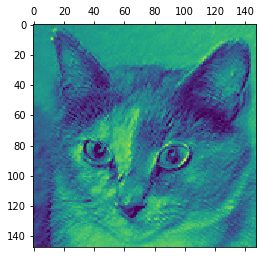

In [12]:
plt.matshow(first_layer_activation[0, :, :, 7], cmap='viridis')

/home/ubuntu/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/ipykernel/__main__.py:21: RuntimeWarning: invalid value encountered in true_divide


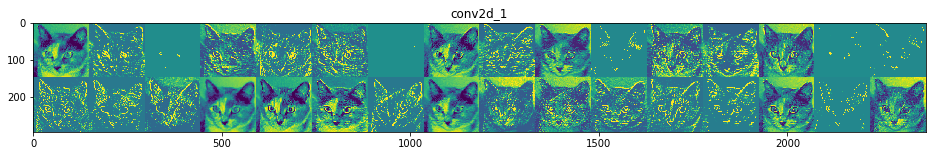

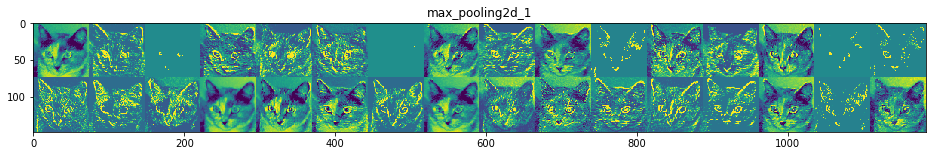

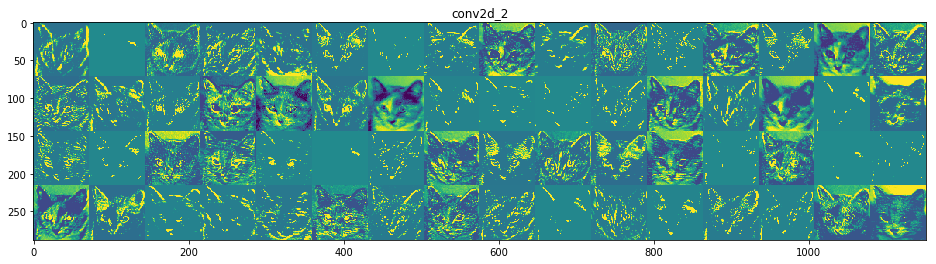

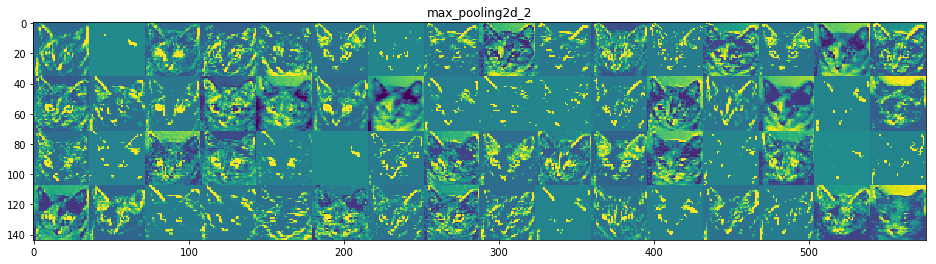

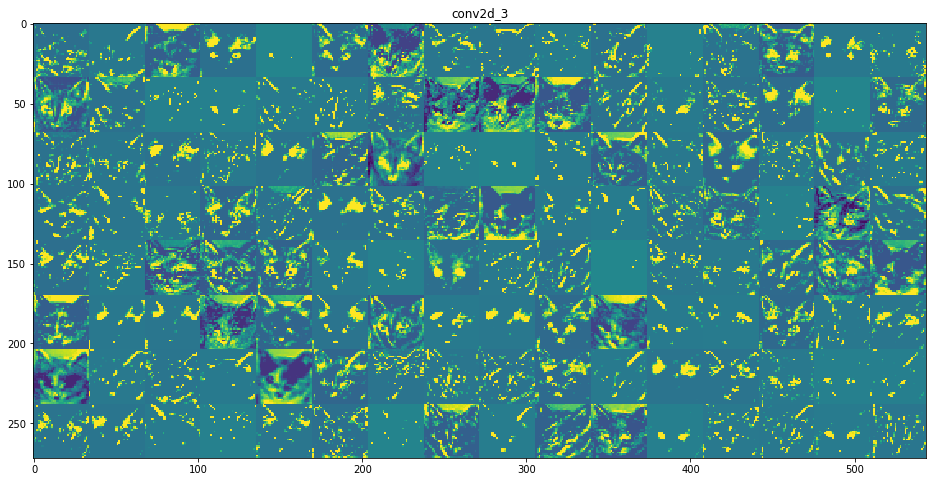

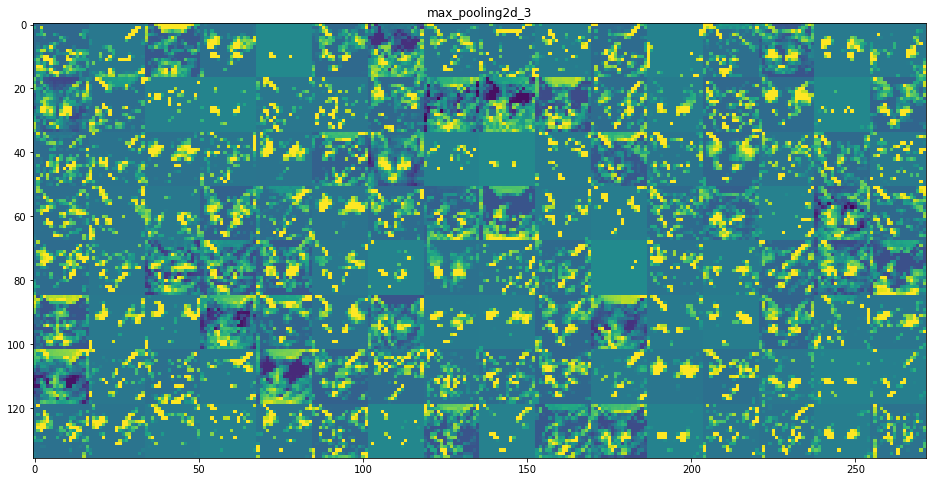

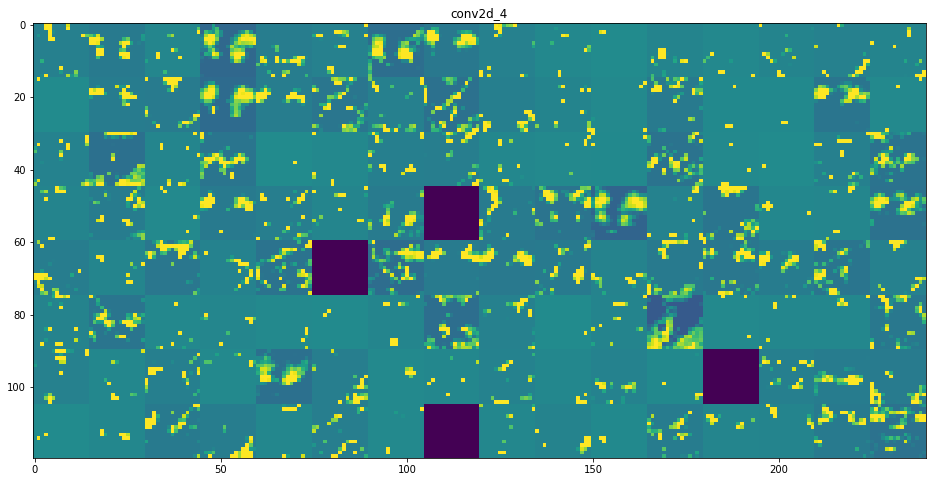

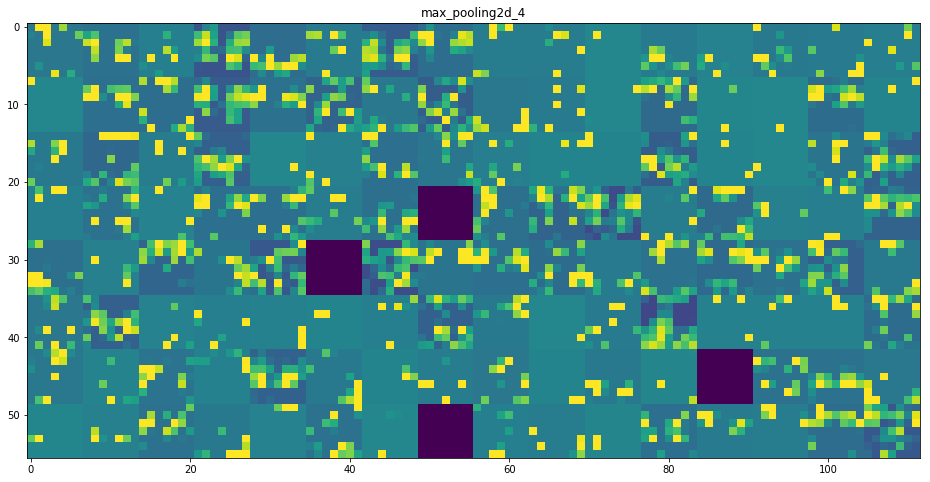

In [13]:
layer_names = []
for layer in model.layers[:8]:
    layer_names.append(layer.name)

images_per_row = 16

for layer_name, layer_activation in zip(layer_names, activations):
    n_features = layer_activation.shape[-1]

    size = layer_activation.shape[1]

    n_cols = n_features // images_per_row
    display_grid = np.zeros((size * n_cols, images_per_row * size))

    for col in range(n_cols):
        for row in range(images_per_row):
            channel_image = layer_activation[0,
                                             :, :,
                                             col * images_per_row + row]
            channel_image -= channel_image.mean()
            channel_image /= channel_image.std()
            channel_image *= 64
            channel_image += 128
            channel_image = np.clip(channel_image, 0, 255).astype('uint8')
            display_grid[col * size : (col + 1) * size,
                         row * size : (row + 1) * size] = channel_image

    scale = 1. / size
    plt.figure(figsize=(scale * display_grid.shape[1],
                        scale * display_grid.shape[0]))
    plt.title(layer_name)
    plt.grid(False)
    plt.imshow(display_grid, aspect='auto', cmap='viridis')

* Here is possible to see that:
    * First layers learn edges
    * Higher layers learn higher abstractions(such as a cat ear), which are more related to each image class
    * Sparsity of higher layers increase, which results in blank filters(blanks mean that features encoded by that filter are not present in the input)